In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

In [4]:
with open('data/train.csv', 'r') as f:
    data = np.loadtxt(f, skiprows=1, delimiter=',')
X = data[:, 1:]
X = X / 255.
y = data[:, 0].astype(int)
m, n = X.shape

with open('data/test.csv', 'r') as f:
    test_data = np.loadtxt(f, skiprows=1, delimiter=',')
X_test = test_data / 255.
m_test, n_test = X_test.shape

KeyboardInterrupt: 

In [16]:
train_size = int(m * 0.9)
X_train = X[: train_size]
y_train = y[: train_size]

X_cv = X[train_size:]
y_cv = y[train_size:]

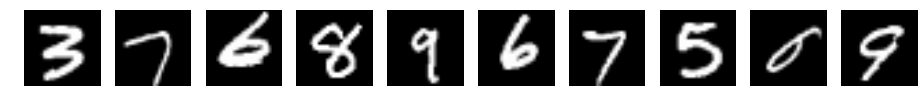

Labels:  [3 7 6 8 9 6 7 5 0 9]


In [17]:
plt.figure(figsize=(16, 16))
sel = np.random.choice(m, 10, replace=False)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[sel[i]].reshape((28, 28)), cmap='gray')
    plt.axis('off')
plt.show()
print('Labels: ', y[sel].ravel())

In [18]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)

clf.fit(X_train, y_train)
h_train = clf.predict(X_train)
print('Training set accuracy: {:.2%}'.format(np.sum(h_train == y_train) / train_size))

h_cv = clf.predict(X_cv)
print('Cross-Validation set accuracy: {:.2%}'.format(np.sum(h_cv == y_cv) / (m - train_size)))

Training set accuracy: 100.00%
Cross-Validation set accuracy: 97.00%


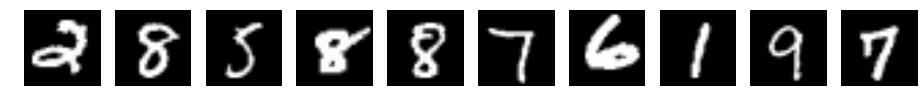

Labels:  [2 8 5 8 8 7 6 1 9 7]


In [32]:
h_test = clf.predict(X_test).reshape(-1, 1)

plt.figure(figsize=(16, 16))
sel = np.random.choice(m_test, 10, replace=False)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[sel[i]].reshape((28, 28)), cmap='gray')
    plt.axis('off')
plt.show()
print('Labels: ', h_test[sel].ravel())


indices = np.arange(1, m_test+1, 1, int).reshape(-1, 1)
ans = np.append(indices, h_test, axis=1)

with open('submit.csv', 'wb') as f:
    np.savetxt(f, ans, ['%d', '%d'], delimiter=',',
               header='ImageId,Label', comments='')